# Project: Schizophrenia Detection using EEG Data
**Author:** Numan Waziry 

This Jupyter notebook contains the code for the project on Schizophrenia Detection using EEG data.
The corresponding project report can be found [**here**](http://numanwaziri.github.io/posts/eeg-schizophrenia-detection/).

# Import libraries (***Includes custom functions from util module***)

In [1]:
# Standard libraries
import joblib
import os

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection and Validation
from sklearn.model_selection import GridSearchCV

# Machine Learning Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import (
    AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
    RandomForestClassifier
)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Ensemble and Boosting Frameworks
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance



# Data Visualization
import matplotlib.pyplot as plt

# Parallel Processing
from tqdm import tqdm

# Local Utilities
from utils import (
    evaluate_model, extract_features, format_model_metrics,
    import_data, plot_confusion_matrix, plot_precision_recall_curves,
    plot_roc_curves
)


# Import and transform data
all the preprocessing steps are defined in the 'util' module helper functions

In [ ]:
imported_data = import_data(16)
X, y, (X_train, X_test, y_train, y_test) = extract_features(imported_data, return_ml_ready=True)

# Find best paramters and save models

In [ ]:
def perform_and_return_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, n_jobs=-1, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

# Define the directory to save the model grids to
if not os.path.exists("grids"):
    os.makedirs("grids")


# QDA pipeline and parameter grid
pipeline_qda = Pipeline([
    ('scaler', StandardScaler()),
    ('qda', QuadraticDiscriminantAnalysis())
])
param_grid_qda = {
    'qda__reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 0.99],
    'qda__store_covariance': [True, False],
    'qda__tol': [1e-4, 1e-5, 1e-6],
}
fitted_grid_search_qda = perform_and_return_grid_search(pipeline_qda, param_grid_qda, X_train, y_train)
joblib.dump(fitted_grid_search_qda,"./grids/qda_grid.pkl")

#...................................................................................................................

# Logistic Regression pipeline and parameter grid
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=3000))
])
param_grid_logreg = {
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2', 'elasticnet'],
    'logreg__solver': ['liblinear', 'saga'],
    'logreg__l1_ratio': [0.1, 0.5, 0.9]
}
fitted_grid_search_logreg = perform_and_return_grid_search(pipeline_logreg, param_grid_logreg, X_train, y_train)
joblib.dump(fitted_grid_search_logreg,"./grids/logreg_grid.pkl")
#...................................................................................................................

# SVC pipeline and parameter grid
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42,probability=True))
])
param_grid_svc = {
    'svc__C': [1, 10, 12],
    'svc__kernel': ['rbf', 'linear', 'poly'],
    'svc__gamma': ['scale', 'auto']
}
fitted_grid_search_svc = perform_and_return_grid_search(pipeline_svc, param_grid_svc, X_train, y_train)
joblib.dump(fitted_grid_search_svc,"./grids/svc_grid.pkl")
#...................................................................................................................

# KNN pipeline and parameter grid
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 10, 15, 20],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']
}
fitted_grid_search_knn = perform_and_return_grid_search(pipeline_knn, param_grid_knn, X_train, y_train)
joblib.dump(fitted_grid_search_knn,"./grids/knn_grid.pkl")
#...................................................................................................................

# LightGBM parameter grid
param_grid_lgbm = {
    'num_leaves': [31, 71],
    'max_depth': [-1, 10],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [98, 198]
}
lgbm_model = lgb.LGBMClassifier(verbosity=-1)
fitted_grid_search_lgbm = perform_and_return_grid_search(lgbm_model, param_grid_lgbm, X_train, y_train)
joblib.dump(fitted_grid_search_lgbm,"./grids/lgbm_grid.pkl")
#...................................................................................................................

# XGBoost parameter grid
param_grid_xgb = {
    'max_depth': [0, 3, 6, 9],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_leaves': [50, 70, 90, 110]
}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
fitted_grid_search_xgb = perform_and_return_grid_search(xgb_model, param_grid_xgb, X_train, y_train)
joblib.dump(fitted_grid_search_xgb,"./grids/xgb_grid.pkl")
#...................................................................................................................

# Bagging Classifier parameter grid
param_grid_bagging = {
    'n_estimators': [70, 100, 130, 150],
    'max_samples': [0.6, 0.8, 1.0],
    'max_features': [0.6, 0.8, 1.0],
}
bagging_clf = BaggingClassifier(random_state=0, n_jobs=-1)
fitted_grid_search_bagging = perform_and_return_grid_search(bagging_clf, param_grid_bagging, X_train, y_train)
joblib.dump(fitted_grid_search_bagging,"./grids/bagging_grid.pkl")
#...................................................................................................................

# Random Forest parameter grid
param_grid_rf = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200],
    'max_features': [220, 'log2', 'sqrt']
}
rf = RandomForestClassifier(random_state=42)
fitted_grid_search_rf = perform_and_return_grid_search(rf, param_grid_rf, X_train, y_train)
joblib.dump(fitted_grid_search_rf,"./grids/rf_grid.pkl")
#...................................................................................................................

# Decision Tree parameter grid
param_grid_dtree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 5, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
dtree = DecisionTreeClassifier(random_state=42)
fitted_grid_search_dtree = perform_and_return_grid_search(dtree, param_grid_dtree, X_train, y_train)
joblib.dump(fitted_grid_search_dtree,"./grids/dtree_grid.pkl")
#...................................................................................................................

# Gradient Boosting Classifier parameter grid
param_grid_gb = {
    'max_depth': [11, 12, 13, 14, 15, 16]
}
gb = GradientBoostingClassifier(random_state=42, learning_rate=0.2, n_estimators=200, verbose=100)
fitted_grid_search_gb = perform_and_return_grid_search(gb, param_grid_gb, X_train, y_train)
joblib.dump(fitted_grid_search_gb,"./grids/gb_grid.pkl")
#...................................................................................................................

#Adaboost Classifier parameter grid
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada_boost = AdaBoostClassifier(random_state=42)
fitted_grid_search_ab = perform_and_return_grid_search(ada_boost, param_grid_ab, X_train, y_train)
joblib.dump(fitted_grid_search_gb,"./grids/adaboost_grid.pkl")

# Retrieve best models from the saved grid search files

In [4]:
folder_path = './grids/'
best_estimators = {}

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.pkl'):
        # Load the grid object's best estimator from the file
        grid = joblib.load(os.path.join(folder_path, filename)).best_estimator_
        
        # Extract the model name
        model_name = os.path.splitext(filename)[0].split("_")[0]
        
        # Add the grid object to the dictionary with the model name as the key
        best_estimators[model_name] = grid


# Calculate and save results with cross-validation

In [21]:
results = {}
for model in tqdm(best_estimators):
     results[model] = evaluate_model(best_estimators[model],X,y,cv_folds=5)

joblib.dump(results,"evaluation_results.pkl")

['evaluation_results.pkl']

## Display Results

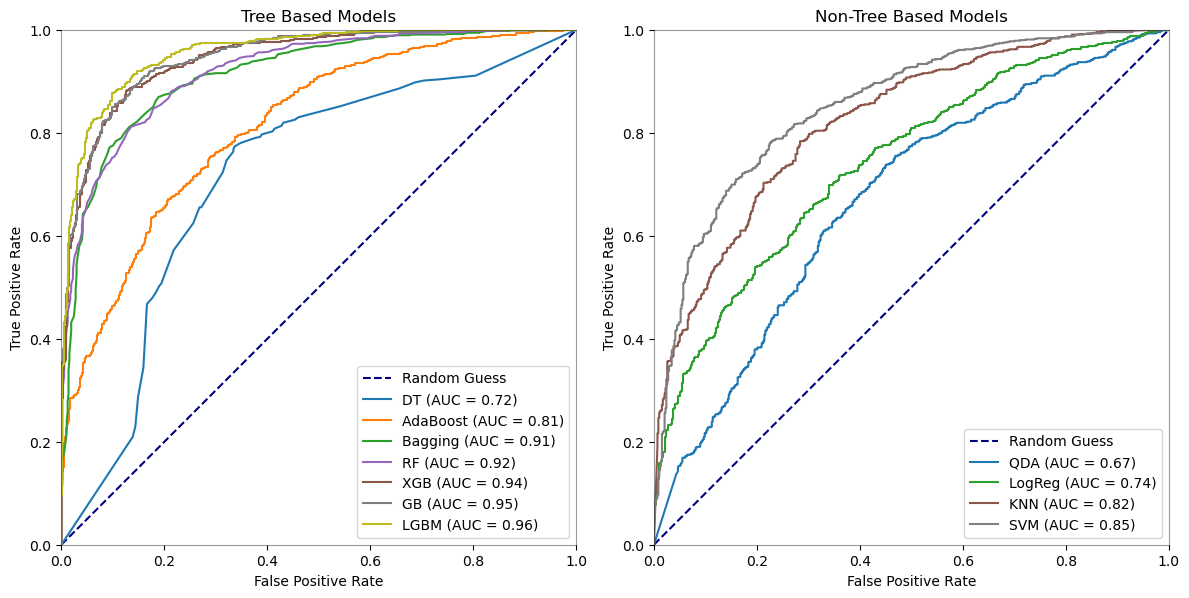

In [14]:
# Load results
results = joblib.load("evaluation_results.pkl")

# Define tree vs non-tree based models
tree_based_models = ["DT", "RF", "GB", "XGB", "LGBM", "AdaBoost",'Bagging']
tree_based_results = {key: value for key, value in results.items() if key in tree_based_models}
non_tree_based_results = {key: value for key, value in results.items() if key not in tree_based_models}

# Plot the roc curves
fig_combined, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_roc_curves(tree_based_results, figsize=(6, 6),ax=ax1,title="Tree Based Models");
plot_roc_curves(non_tree_based_results, figsize=(6, 6),ax=ax2,title="Non-Tree Based Models");
plt.tight_layout()

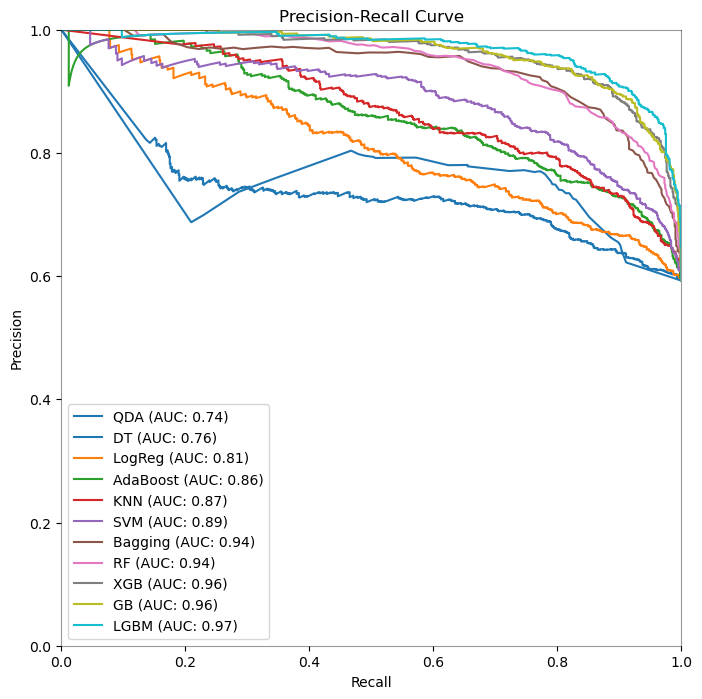

In [15]:
# plot the Precision-Recall Curve
plot_precision_recall_curves(results,figsize=(8,8));

In [3]:
format_model_metrics(results)

,accuracy,precision,recall,roc_auc
QDA,65.54 ± 0.93,73.48 ± 1.14,66.21 ± 0.93,69.68 ± 0.98
LogReg,70.04 ± 1.30,72.99 ± 0.88,79.08 ± 1.42,75.81 ± 1.09
DT,72.03 ± 1.68,76.46 ± 1.06,76.81 ± 3.17,72.41 ± 0.66
AdaBoost,75.55 ± 0.47,78.11 ± 0.68,82.08 ± 1.44,82.33 ± 0.81
KNN,75.83 ± 0.54,79.19 ± 0.28,80.76 ± 1.07,82.83 ± 0.49
SVM,78.02 ± 0.34,80.61 ± 0.84,83.23 ± 0.80,85.13 ± 0.53
Bagging,85.11 ± 0.57,84.12 ± 1.04,92.56 ± 1.01,92.01 ± 0.48
RF,85.12 ± 0.19,84.13 ± 0.63,92.56 ± 1.35,92.78 ± 0.43
GB,87.65 ± 0.94,86.40 ± 0.89,94.14 ± 0.74,94.94 ± 0.41
XGB,87.93 ± 0.85,87.69 ± 0.69,92.82 ± 0.78,94.70 ± 0.53


Confusion matrix for Bagging model


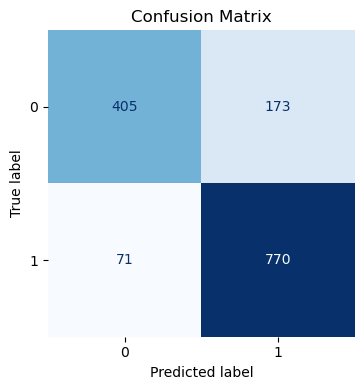

Confusion matrix for DT model


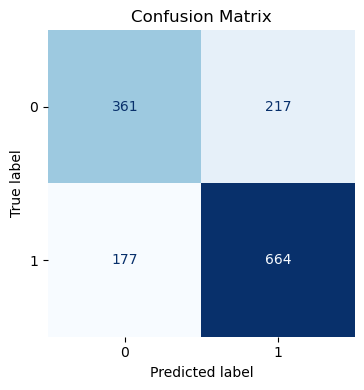

Confusion matrix for GB model


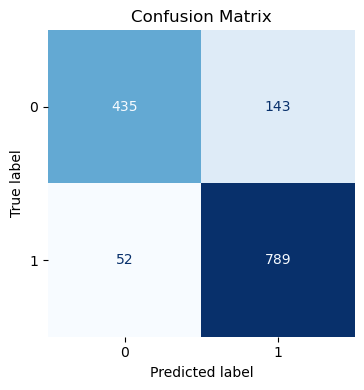

Confusion matrix for KNN model


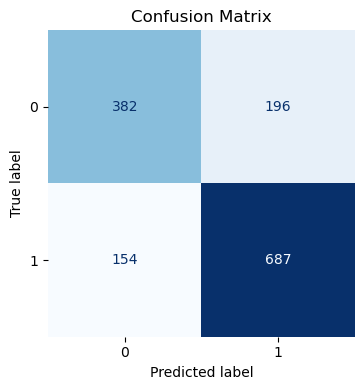

Confusion matrix for LGBM model


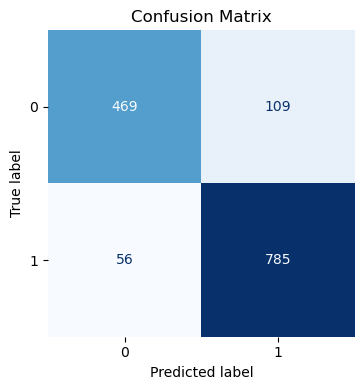

Confusion matrix for LogReg model


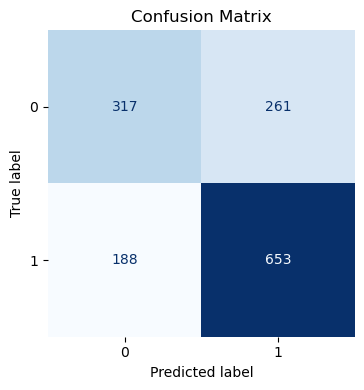

Confusion matrix for QDA model


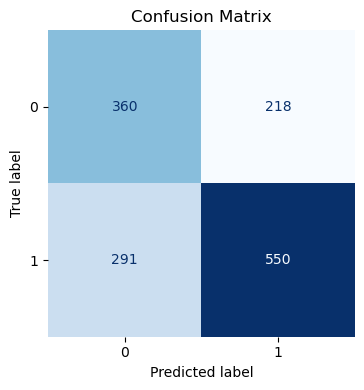

Confusion matrix for RF model


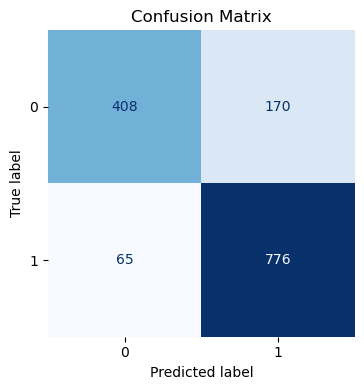

Confusion matrix for SVM model


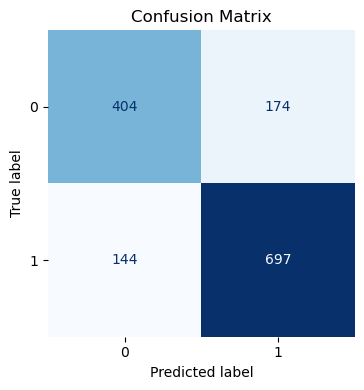

Confusion matrix for XGB model


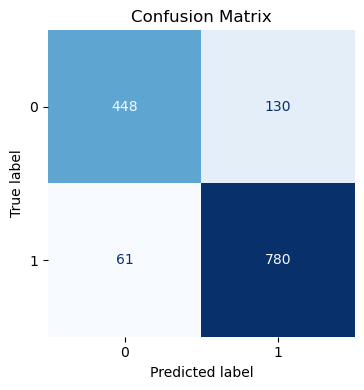

Confusion matrix for AdaBoost model


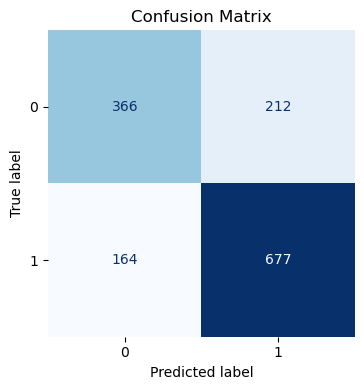

In [39]:
# Plot Confusion Matrices
for model in results:
    print(f"Confusion matrix for {model} model")
    matrix =plot_confusion_matrix(results[model]["confusion_matrix"], color_palette='Blues', mode='light', figsize=(4, 4))